# Results: Model 2 (Period)

This notebook displays BML results for the period model.

In [1]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [3]:
library(brms)
library(dplyr)
library(data.table)

library(tidyverse)
library(ggridges)
options(warn = -1)

## Model

Model expressed in lme4 format:
$$\text{diff} \sim 1 + \text{period} + \text{state} + \text{trait} + (1 + \text{perid}| \text{ Subj}) + (1 + \text{period} +  \text{state} + \text{trait} | \text{ ROI})$$

Full model therefore (in the notation McElreath 2020):  

$$
\Delta_{s,r,p} \sim \text{Student t}(\nu, \mu_{s,r,p},\sigma^{2})
$$
and,
$$
\begin{align*}
\mu_{s,r,p} = \ & \alpha + \alpha_{\text{subj}[s]} + \alpha_{\text{roi}[r]} \ + \\
            & (\beta_{\text{state}} + \beta_{\text{state}, \text{roi}[r]}) \times \text{State}_{s,r,p} \ +  \\
            & (\beta_{\text{trait}} + \beta_{\text{trait}, \text{roi}[r]}) \times \text{Trait}_{s,r,p} \ + \\
            & (\beta_{\text{period}} + \beta_{\text{period}, \text{subj}[s]} + \beta_{\text{period}, \text{roi}[r]}) \times \text{Period}_{s,r,p}
\end{align*}
$$
where,
$$
\begin{bmatrix}
\alpha_{\text{roi}[r]} \\
\beta_{\text{state}, \text{roi}[r]} \\
\beta_{\text{trait}, \text{roi}[r]} \\
\beta_{\text{period}, \text{roi}[r]}
\end{bmatrix} \sim \text{Multivariate t}
\begin{pmatrix}
\nu_{\text{roi}}, \ 
\begin{bmatrix}
 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}, \text{ } \mathbf{S}
\end{pmatrix}
$$
\
$$
\begin{bmatrix}
\alpha_{\text{subj}[s]} \\
\beta_{\text{period}, \text{subj}[s]}
\end{bmatrix} \sim \text{Multivariate t}
\begin{pmatrix}
\nu_{\text{subj}}, \ 
\begin{bmatrix}
 0 \\ 0
\end{bmatrix}, \text{ } \mathbf{U}
\end{pmatrix}
$$
and,
$$
\begin{aligned}
    \mathbf{S} & = 
    \begin{pmatrix}
        \sigma_{\alpha_{\text{roi}}}^2 &   
        \rho_{1,2}\sigma_{\alpha_{\text{roi}}}\sigma_{\beta_{\text{state}, \text{roi}}} &
        \rho_{1,3}\sigma_{\alpha_{\text{roi}}}\sigma_{\beta_{\text{trait}, \text{roi}}} &
        \rho_{1,4}\sigma_{\alpha_{\text{roi}}}\sigma_{\beta_{\text{period}, \text{roi}}} \\
            &
        \sigma_{\beta_{\text{trait}, \text{roi}}}^2 & 
        \rho_{2,3}\sigma_{\beta_{\text{state}, \text{roi}}}\sigma_{\beta_{\text{trait}, \text{roi}}} &
        \rho_{2,4}\sigma_{\beta_{\text{state}, \text{roi}}}\sigma_{\beta_{\text{period}, \text{roi}}} \\
            &
            & 
        \sigma_{\beta_{\text{trait}, \text{roi}}}^2 &
        \rho_{3,4}\sigma_{\beta_{\text{trait}, \text{roi}}}\sigma_{\beta_{\text{period}, \text{roi}}} \\
        &
        &
        &
        \sigma_{\beta_{\text{period}, \text{roi}}}^2
    \end{pmatrix} \\
                    & = 
    \begin{pmatrix}
        \sigma_{\alpha_{\text{roi}}}^2 &   &   & \\
        &   \sigma_{\beta_{\text{state}, \text{roi}}}^2  &   & \\
        &   &   \sigma_{\beta_{\text{trait}, \text{roi}}}^2  & \\
        &   &   &   \sigma_{\beta_{\text{period}, \text{roi}}}^2
    \end{pmatrix} \mathbf{R}
    \begin{pmatrix}
        \sigma_{\alpha_{\text{roi}}}^2 &   &   & \\
        &   \sigma_{\beta_{\text{state}, \text{roi}}}^2  &   & \\
        &   &   \sigma_{\beta_{\text{trait}, \text{roi}}}^2  & \\
        &   &   &   \sigma_{\beta_{\text{period}, \text{roi}}}^2
    \end{pmatrix}
\end{aligned}
$$
and,
$$
\mathbf{R} = 
\begin{pmatrix}
    1   &   \rho_{1,2}  &   \rho_{1,3}   & \rho_{1,4} \\
        &   1   &   \rho_{2,3}  & \rho_{2,4} \\
        &   &   1   &   \rho_{3,4} \\
        &   &   &   1
\end{pmatrix}
$$
similarly,
$$
\begin{aligned}
    \mathbf{U} & = 
     \begin{pmatrix}
        \sigma_{\alpha_{\text{subj}}}^2   &\\
        &    \sigma_{\beta_{\text{period}, \text{subj}}}^2
    \end{pmatrix} \mathbf{P}
     \begin{pmatrix}
        \sigma_{\alpha_{\text{subj}}}^2   &\\
        &    \sigma_{\beta_{\text{period}, \text{subj}}}^2
    \end{pmatrix}
\end{aligned}
$$
\
$$
\mathbf{P} = 
\begin{pmatrix}
    1   & \phi  \\
    &   1
\end{pmatrix}
$$

Given the following weakly-informative priors:
$$\alpha \sim \text{Student t}(3, \mu_{y}, 2.5)$$
$$\beta_{j} \sim \text{Student t}(3, 0, 2.5)$$
$$\sigma \sim \text{Half Student}(3, 0, 2.5)$$
$$\nu \sim \text{Gamma}(3.325, 0.2)$$
$$\nu_{\text{subj}} \sim \text{Gamma}(3.325, 0.2)$$
$$\nu_{\text{roi}} \sim \text{Gamma}(3.325, 0.2)$$
$$\sigma_{\alpha_{\text{subj}}} \sim \text{Half Student}(3, 0, 2.5)$$
$$\sigma_{\beta_{\text{period}, \text{subj}}} \sim \text{Half Student}(3, 0, 2.5)$$
$$\sigma_{\alpha_{\text{roi}}} \sim \text{Half Student}(3, 0, 2.5)$$
$$\sigma_{\beta_{j, \text{roi}}} \sim \text{Half Student}(3, 0, 2.5)$$
$$\mathbf{P} \sim \text{LKJcorr}(2)$$
$$\mathbf{R} \sim \text{LKJcorr}(2)$$
notice that $\mu_{y}$ is the sample mean of $\Delta_{s,r,p}$ \; $j=\text{state, trait, period}$

In [4]:
# Load the BML output image
phase <- 'phase'
load(paste0('results_offset/model2/period_diff.RData'))
outDir = paste0('results_offset/model2/', phase, '_')
summary_file = paste0(outDir, 'summary.txt')

In [5]:
print('Following are the first few rows of thet dataset used in BML')
head(dataTable)

[1] "Following are the first few rows of thet dataset used in BML"


,Subj,ROI,phase,diff,TRAIT,STATE
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,MAX101,L_ACC,-0.5,0.4798510,-1.164152,-1.011495
2,MAX101,L_ACC,0.5,0.0424938,-1.164152,-1.011495
3,MAX101,L_BLBM_Amygdala,-0.5,-0.6277587,-1.164152,-1.011495
4,MAX101,L_BLBM_Amygdala,0.5,-2.3971760,-1.164152,-1.011495
5,MAX101,L_BST,-0.5,0.7695330,-1.164152,-1.011495
6,MAX101,L_BST,0.5,0.4968420,-1.164152,-1.011495


In [6]:
EOIq <- unlist(lapply(strsplit(mod,'\\+')[[1]],trimws))
if(!('Intercept' %in% EOIq)) EOIq <- c('Intercept', EOIq)
EOIq <- EOIq[!grepl('1', EOIq)]

print('Fixed effect model terms:')
print(EOIq)

[1] "Fixed effect model terms:"
[1] "Intercept" "phase"     "TRAIT"     "STATE"    


In [9]:
# Print the BML output summary
cat('====================================== BML output Summary ======================================',
    file = summary_file, sep = '\n')
cat(capture.output(summary(fm)), file = summary_file, sep = '\n')
print(summary(fm))

 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: diff ~ 1 + phase + TRAIT + STATE + (1 + phase + TRAIT + STATE | gr(ROI, dist = "student")) + (1 + phase | gr(Subj, dist = "student")) 
   Data: dataTable (Number of observations: 18530) 
Samples: 4 chains, each with iter = 20000; warmup = 10000; thin = 1;
         total post-warmup samples = 40000

Group-Level Effects: 
~ROI (Number of levels: 85) 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
df                      11.34      6.29     4.05    28.62 1.01      851
sd(Intercept)            0.29      0.03     0.23     0.35 1.00     2432
sd(phase)                0.19      0.02     0.14     0.24 1.00     4043
sd(TRAIT)                0.06      0.01     0.04     0.08 1.00     8332
sd(STATE)                0.04      0.01     0.02     0.06 1.00    12339
cor(Intercept,phase)    -0.20      0.13    -0.43     0.06 1.00    16167
cor(Intercept,TRAIT)    -0.28      0.16    -0.57     0.04 1.0

In [8]:
# Extract posteriors for fixed (aa) and random effects (bb)
aa <- fixef(fm, summary = FALSE)/SCALE # Population-Level Estimates
bb <- lapply(ranef(fm, summary = FALSE), `/`, SCALE) # Extract Group-Level (or random-effect)

# Sum the fixed and random effect (only ROI) posterior. Following function does this.
# The function adds the "the poaterior of the global intercept (or slope) with the 
# intercept (or slope) posterior of each roi. bb[['ROI']][,,tm] is a matrix with 
# columns containing posteriors for every ROI
# aa[,tm] is a single column posterior for the global intercept/slope.
# intercept or slope is defined by tm, where tm is the index of the model term.
psROI <- function(aa, bb, tm) {
  ps <- apply(bb[['ROI']][,, tm], 2, '+', aa[, tm])
  return(ps)
}

#################################### Following functions are used for summarizing BML and GLM outputs in a table from ############################
# function to compute P+
cnt <- function(x, ns) return(sum(x > 0) / ns)

# function that creates a BML summary table for ROI posteriors (mean, std, and quartiles),
# nd - number of digits to output
sumROI <- function(samples, ns, nd) {
    hubs <- data.frame(cbind(apply(samples, 2, mean), 
                             apply(samples, 2, sd), 
                             apply(samples, 2, cnt, ns), 
                             t(apply(samples, 2, quantile, probs=c(0.025, 0.05, 0.5, 0.95, 0.975)))))
    names(hubs) <- c('mean', 'SD', 'P+', '2.5%', '5%', '50%', '95%', '97.5%')
    return(round(hubs,nd))
}

In [9]:
# function that run conventional glm on each ROI individually
sumGLM <- function(ll, tm, nR, DF, nd) {
   th <- qt(c(0.025, 0.05, 0.5, 0.95, 0.975), DF)
   rr <- matrix(0, nrow = nR, ncol = 8, dimnames=list(levels(dataTable$ROI), c('mean', 'SD', '2-sided-p', '2.5%', '5%', '50%', '95%', '97.5%')))
   rownames(rr) <- levels(dataTable$ROI)
   if(tm == 'Intercept') tm <- '(Intercept)'
   for(ii in 1:nR) {
     u1 <- ll[[ii]]$coefficients[tm,1] # mean
     u2 <- ll[[ii]]$coefficients[tm,2] # sd
     u3 <- ll[[ii]]$coefficients[tm,4] # 2-sided p
     rr[ii,] <- round(c(u1, u2, u3, u1+u2*th),nd)
   } 
   return(rr)
}

In [10]:
# Following print BML and GLM result summary for each ROI
for (ii in 1:length(EOIq)){

    cat(sprintf('========= Summary of region effects for %s (RBA results) =========', EOIq[ii]), 
        file = summary_file, sep = '\n', append=TRUE)
    ps0 <- psROI(aa, bb, EOIq[ii])
    gg_brm <- sumROI(ps0, ns, nfigs)
    write.table(gg_brm,file = paste0(outDir, EOIq[ii], '.txt'), sep = ',')

    cat(capture.output(gg_brm), file = summary_file, sep = '\n', append=TRUE)

    cat(sprintf('==================================================================================================================='), 
        file = summary_file, sep='\n', append=TRUE)
}

In [19]:
plotPDP <- function(posteriors){
    # prepare the dataframe
    posteriors <- posteriors %>% as_tibble()
    
    name <- read.table("data/name.txt", header = TRUE, sep = ",")
    name[] <- lapply(name, as.character)
    name[] <- lapply(name, str_trim, side = "both")
    colnames(posteriors) <- stringr::str_replace_all(posteriors %>% colnames(), setNames(pull(name["new"]), pull(name["old"])))
    
    p_plus <- function(x){
        return(sum(x > 0, na.rm = TRUE)/length(x))
    }
    
    P_df <- apply(posteriors, 2, p_plus) %>% as.data.frame()
    P_df <- tibble(ROI = row.names(P_df), 
                   p_plus = P_df[, 1],
                   mean = apply(posteriors, 2, mean))
    P_df <- P_df %>% arrange(p_plus, mean) %>% mutate(rank = c(1: dim(P_df)[1]))
    
    ps_long <- gather(posteriors, key = "ROI", value = "posterior")
    
    ps_long <- full_join(ps_long, P_df, by = "ROI") %>% 
                    mutate(p.plot = p_plus) %>% 
                    mutate(p.plot = replace(p.plot, p.plot > 0.15 & p.plot < 0.85, NA))
    
    ## starting plotting
    plot <- ps_long %>%
        ggplot(aes(x = posterior, y = as.numeric(rank), group = ROI, fill = p.plot)) +
        coord_cartesian(xlim = c(min(ps_long$posterior) - min(ps_long$posterior)/9, 
                                 max(ps_long$posterior) - max(ps_long$posterior)/6), 
                        clip = "off") +
        geom_density_ridges(scale = 2.25, 
                            rel_min_height = .001, 
                            alpha = 0.8, 
                            color = '#cccccc',
                            quantile_lines = TRUE,
                            quantiles = 2, 
                            size = 0.5) +
        geom_vline(xintercept = 0, alpha = .85, color = "black", size = .8, linetype = "dashed") +
        scale_x_continuous(breaks = c(-0.5, 0, 0.5, 1), 
                           labels = c("Early > Late", "0", " Early < Late", "1")) +
        scale_y_continuous(breaks = 1:length(P_df$ROI),
                           expand = c(0,0.1),
                           labels = P_df$ROI,
                           sec.axis = sec_axis(~.,
                                               breaks = 1:length(P_df$ROI),
                                               labels = format(round(P_df$p_plus, 3), nsmall = 2))) +
        scale_fill_gradientn(limits = c(0,1),
                             colors = c("#33F7FF", "#67D7FD", "#3A73FC", "#333AFE", "#1D38FD", "#01007A",
                                        "#505154",
                                        "#83FD4C", "#FDFD67", "#FFC300", "#FF5733", "#C70039", "#A50A0A"),
                             values = c(0, 0.025, 0.0250000001, 0.05, 0.050000001, 0.075, 
                                        0.0750000001, 0.1, 0.10000001, 0.125, 0.1250000001, 0.15,
                                        0.150000001, 0.85, 
                                        0.850000001, 0.875, 0.8750000001, 0.9, 0.90000001, 0.925, 
                                        0.9250000001, 0.95, 0.950000001, 0.975, 0.9750000001, 1.0),
                             breaks = c(0, 0.05, 0.1, 0.15, 0.85, 0.9, 0.95, 1)) +
        guides(fill = guide_colorbar(barwidth = 1.25,
                                     barheight = 8,
                                     nbin = 50,
                                     frame.colour = "black",
                                     frame.linewidth = 0.75,
                                     ticks.colour = "black")) +
        theme_ridges(center_axis_labels = TRUE, grid = FALSE) +
        theme(
            plot.background = element_blank(),
            panel.background = element_blank(),
            panel.grid.major.y = element_line(color = "lightgray", size = .75),
            plot.title = element_text(size = 12.5, margin = unit(c(0,0.1,.25,02),"cm"), face = "plain", hjust = 0.5),
            plot.margin = unit(c(1, 2.5, 1, 1), "cm"),
            legend.title = element_text(size = 11, hjust = 0),
            legend.text = element_text(size = 8, angle = 0),
            legend.position = c(1.07, 0.5),
            legend.background = element_rect(),
            legend.box.background = element_rect(colour = "black", size = .5),
            text = element_text(family = "Helvetica"),
            axis.title = element_text(size = 16),
            axis.line = element_line(size = .25),
            axis.text.y = element_text(size= 9, color = "black", margin = unit(c(0,-0.05,0,0.05),"cm"), angle = 0, vjust = 0),
            axis.text.y.right = element_text(size = 9, color = "black",margin = unit(c(0,0,0,-0.05),"cm"), angle = 0),
            axis.text.x = element_text(size = 9, color = "black", margin = unit(c(0.04,0,0,0),"cm")),
            axis.ticks.x = element_line(size = .5),
            axis.ticks.length=unit(.2, "cm"),
            axis.ticks.y = element_blank()) +
        labs(
            x = NULL,
            y = NULL,
            fill = "P+")
    return(plot)
}

In [20]:
posteriors <- psROI(aa, bb, 'phase')

Picking joint bandwidth of 0.0131

Picking joint bandwidth of 0.0131



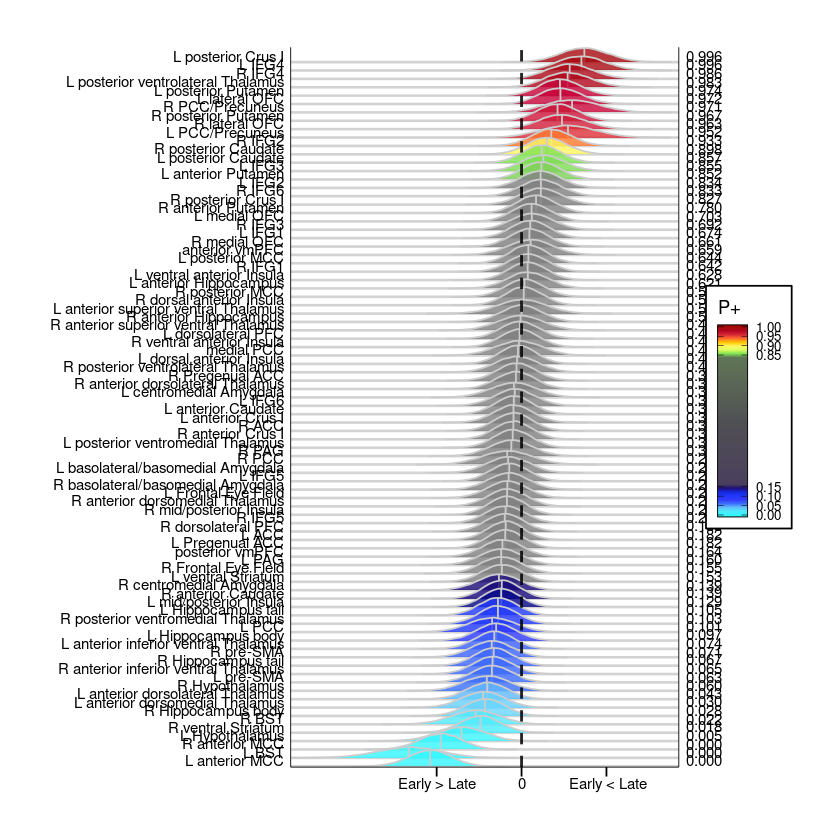

In [22]:
plotPDP(posteriors)

library("svglite")
ggsave(paste0(outDir,'phase.svg'), width= 12 , height = 20)

# Diagnosis

In [17]:
# Posterior predictive check
pp_plot = pp_check(fm, nsamples = 1000) + 
                xlim(c(-4, 4)) + 
                theme(plot.title = element_text(size = 15, hjust = 0.5), 
                      legend.text = element_text(size = 15)) + 
                ggtitle("Posterior predictive check")

In [16]:
skewness <- function(x){
    xdev <- x - mean(x)
    n <- length(x)
    numer <- sum(xdev^3)/n
    denom <- (sum(xdev^2)/n)^(3/2)
    return(numer/denom)
}

kurtosis <- function(x){
    xdev <- x - mean(x)
    n <- length(x)
    numer <- sum(xdev^4)/n
    denom <- (sum(xdev^2)/n)^2
    return(numer/denom - 3)
}

pp_check_stat <- function(fm, stat, xlim){
    plot <- pp_check(fm, 'stat', stat = stat, nsamples = 5000) +
                theme(plot.title = element_text(size = 15, hjust = 0.5), 
                      legend.text = element_text(size = 15)) +
                ggtitle(paste0('Posterior predictive check of ', stat)) +
                xlim(xlim)
    return(plot) 
}

In [17]:
pp_check.mean <- pp_check_stat(fm, 'mean', c(-0.13, 0.0))
pp_check.sd <- pp_check_stat(fm, 'sd', c(1.35, 1.6))
pp_check.skew <- pp_check_stat(fm, 'skewness', c(-2, 2))
pp_check.kurt <- pp_check_stat(fm, 'kurtosis', c(0, 20))


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



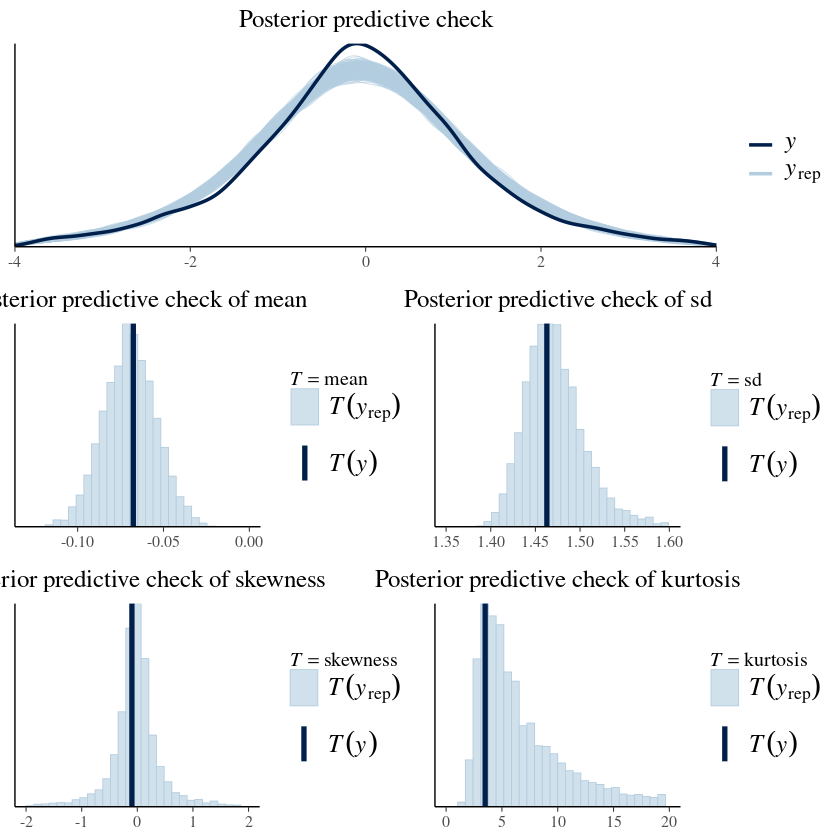

In [18]:
library(gridExtra)

lay <- rbind(c(1,1),
             c(2,3),
             c(4,5))
res <- grid.arrange(pp_plot, pp_check.mean, pp_check.sd, pp_check.skew, pp_check.kurt, 
                    layout_matrix = lay)
ggsave('results_offset/pp_check_early.png', width= 10 , height = 12, units = "in", dpi = 300, plot = res)